In [1]:
# Parameters
config = {
    "notebook": "notebooks/data_explorer.ipynb",
    "data_path": "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/drifting_longlines.csv",
    "output_label": "drifting_longlines",
}


In [2]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv",
    }
print(config)

{'notebook': 'notebooks/data_explorer.ipynb', 'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/drifting_longlines.csv', 'output_label': 'drifting_longlines'}


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')
print(df.shape)
df.head()

(13968727, 10)


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.263956e+13,1.327137e+09,232994.281250,311748.65625,8.2,230.500000,14.865583,-26.853662,-1.0,dalhousie_longliner
1,1.263956e+13,1.327137e+09,233994.265625,312410.34375,7.3,238.399994,14.863870,-26.856800,-1.0,dalhousie_longliner
2,1.263956e+13,1.327137e+09,233994.265625,312410.34375,6.8,238.899994,14.861551,-26.860649,-1.0,dalhousie_longliner
3,1.263956e+13,1.327143e+09,233994.265625,315417.37500,6.9,251.800003,14.822686,-26.865898,-1.0,dalhousie_longliner
4,1.263956e+13,1.327143e+09,233996.390625,316172.56250,6.1,231.100006,14.821825,-26.867579,-1.0,dalhousie_longliner


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13968727 entries, 0 to 13968726
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mmsi                 float64
 1   timestamp            float64
 2   distance_from_shore  float64
 3   distance_from_port   float64
 4   speed                float64
 5   course               float64
 6   lat                  float64
 7   lon                  float64
 8   is_fishing           float64
 9   source               object 
dtypes: float64(9), object(1)
memory usage: 1.0+ GB
None


In [5]:
df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,1.396873e+07,1.396873e+07,1.396873e+07,1.396873e+07,1.396863e+07,1.396863e+07,1.396873e+07,1.396873e+07,1.396873e+07
mean,1.293850e+14,1.434290e+09,5.845311e+05,7.897505e+05,5.464779e+00,1.814876e+02,-8.997629e+00,3.758693e+00,-9.743015e-01
std,7.887357e+13,3.984275e+07,5.420068e+05,6.915438e+05,4.043567e+00,1.050503e+02,2.439311e+01,1.095971e+02,2.119947e-01
min,5.601266e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.519017e+01,-1.800000e+02,-1.000000e+00
25%,6.260384e+13,1.410706e+09,1.019092e+05,2.130206e+05,2.100000e+00,9.070000e+01,-2.601550e+01,-8.808668e+01,-1.000000e+00
50%,1.184859e+14,1.447302e+09,4.576393e+05,6.375249e+05,5.500000e+00,1.811000e+02,-1.497954e+01,-1.716495e+00,-1.000000e+00
75%,1.980758e+14,1.466506e+09,9.603664e+05,1.210432e+06,8.500000e+00,2.711000e+02,4.485790e+00,1.009811e+02,-1.000000e+00
max,2.812058e+14,1.480032e+09,4.430996e+06,7.181037e+06,1.023000e+02,5.110000e+02,8.333266e+01,1.799938e+02,1.000000e+00


In [6]:
df["is_fishing"].value_counts()

-1.000000    13748986
 1.000000      138163
 0.000000       79574
 0.666667        1076
 0.333333         809
 0.750000         110
 0.250000           9
Name: is_fishing, dtype: int64

<ipython-input-7-0d4f70fb7023>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


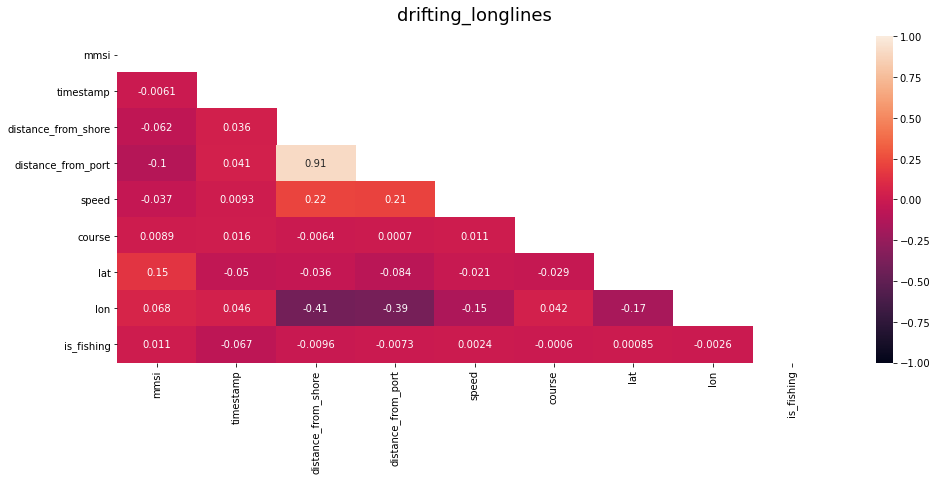

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
title = (config['data_path'].split('/')[-1]).split('.')[0]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title(f'{title}', fontdict={'fontsize':18}, pad=16);

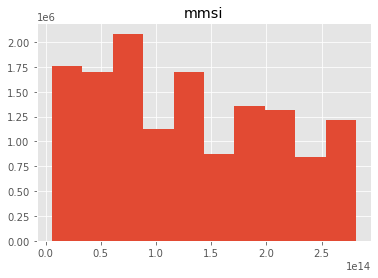

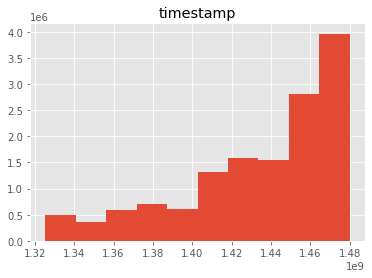

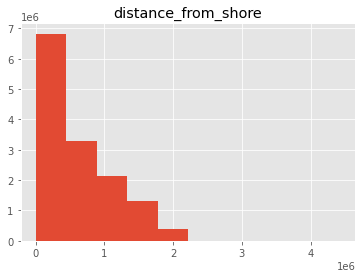

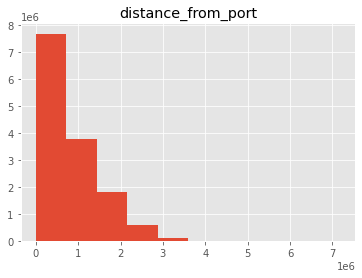

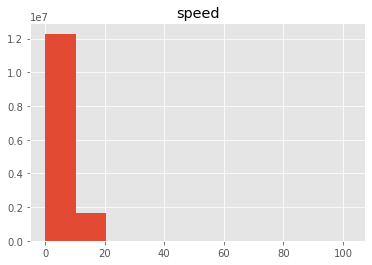

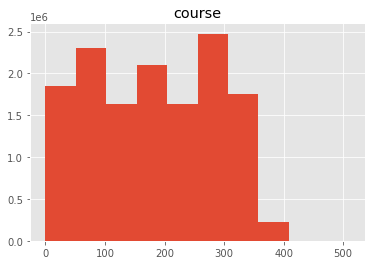

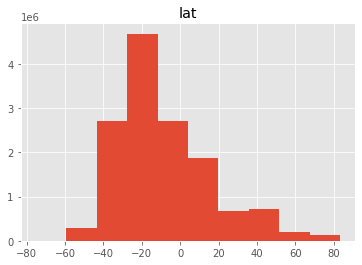

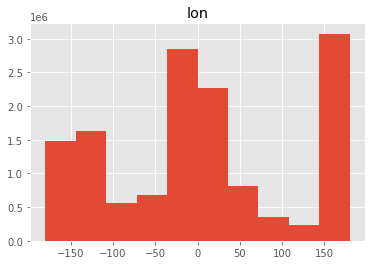

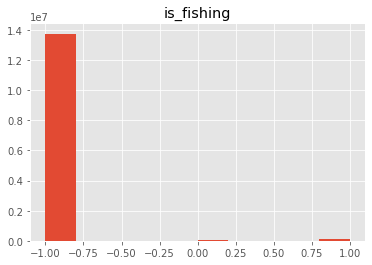

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline    
plt.style.use('ggplot')

for col in df._get_numeric_data().columns:
    ax = df[col].hist()
    ax.set_title(col)
    plt.show()


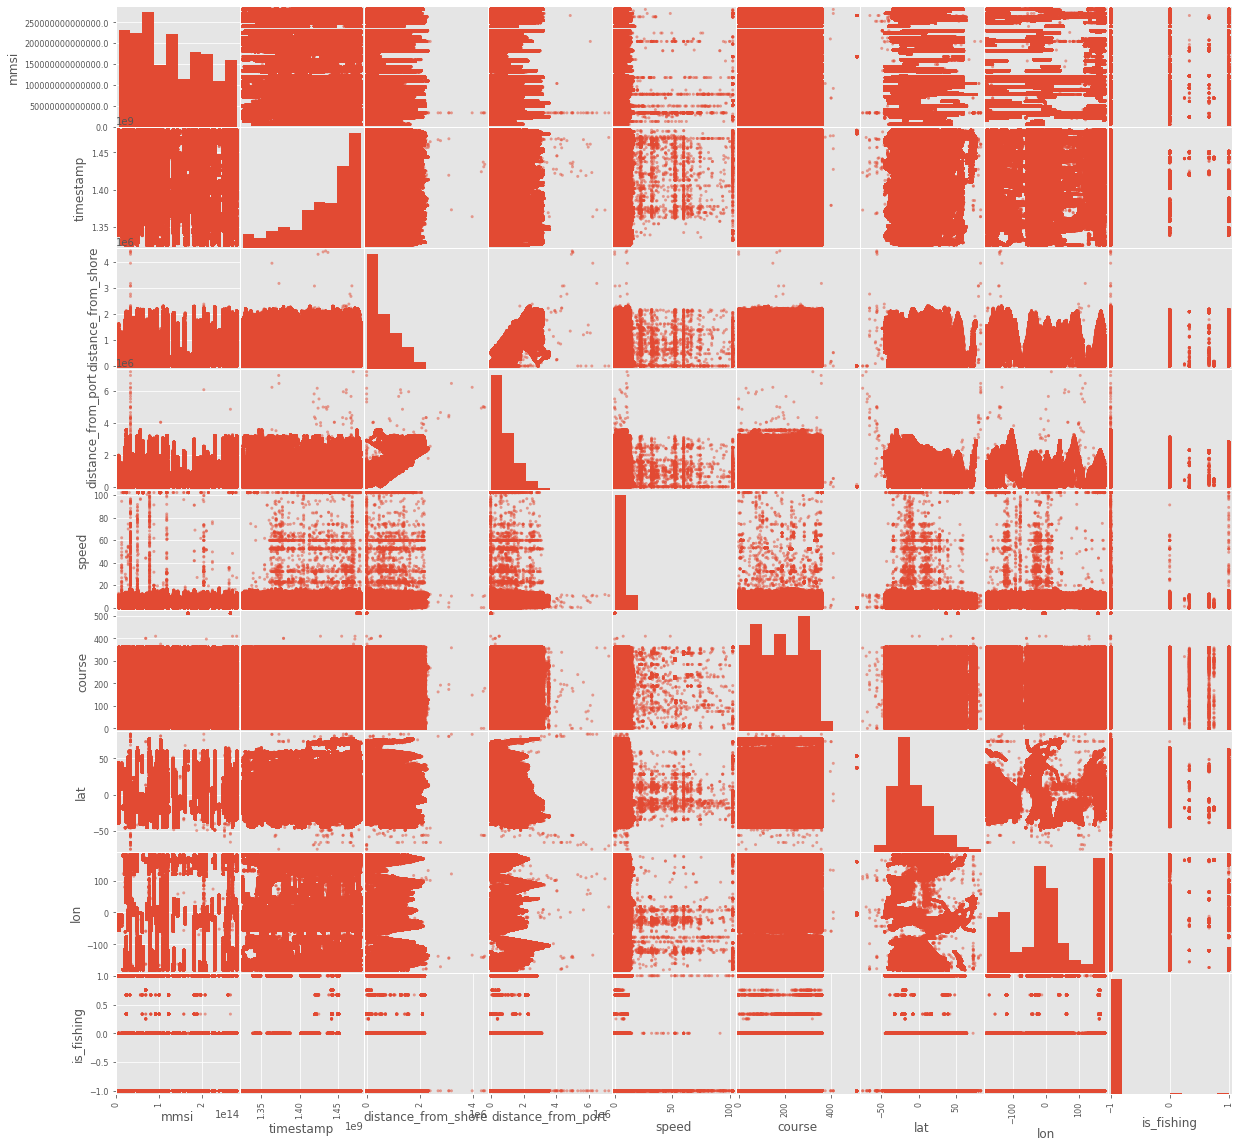

In [9]:
ax = pd.plotting.scatter_matrix(df._get_numeric_data(),figsize=(20,20))
plt.show()


In [10]:
df["is_fishing"].value_counts(normalize=True)

-1.000000    9.842691e-01
 1.000000    9.890880e-03
 0.000000    5.696582e-03
 0.666667    7.702921e-05
 0.333333    5.791508e-05
 0.750000    7.874733e-06
 0.250000    6.442964e-07
Name: is_fishing, dtype: float64

¿Cual es el valor promedio de los buques que estan pescando?

In [11]:
df[df["is_fishing"] == 1].mean()

mmsi                   1.364227e+14
timestamp              1.410694e+09
distance_from_shore    5.851196e+05
distance_from_port     8.179486e+05
speed                  5.309017e+00
course                 1.800258e+02
lat                   -1.015211e+01
lon                   -3.014760e+00
is_fishing             1.000000e+00
dtype: float64

In [12]:
#Nos quedamos con los puntos que estan mayor a 3 millas nauticas de la costa.
df = df[(df['distance_from_shore'] >= 5556)]

#Nos quedamos solamente con los valores que estamos seguros que esta o no esta pescando.
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')

Observamos la velocidad promedio separado por cuando esta o no esta pescando.

In [13]:
columns_to_show = ["speed"]

for column in columns_to_show:
    print('#########')
    print(df.groupby(["is_fishing"])[[column]].describe(percentiles=[]))


#########


                 speed                                          
                 count      mean       std  min  50%         max
is_fishing                                                      
NO          12082817.0  6.124368  3.389167  0.0  6.1  102.300003
SI            138094.0  5.307936  3.232411  0.0  5.1  102.300003


In [14]:
df['mmsi'].value_counts().sort_index(ascending=False)

2.812058e+14    110884
2.810605e+14      5655
2.787982e+14     96098
2.774583e+14      5361
2.713473e+14    249244
                 ...  
2.123271e+13    189764
2.000183e+13     66936
1.650805e+13    122291
1.263956e+13      8268
5.601266e+12     65127
Name: mmsi, Length: 110, dtype: int64

In [15]:
df.groupby('mmsi')['is_fishing'].value_counts(normalize=True).unstack().sort_values(by='mmsi', ascending=False)

is_fishing,NO,SI
mmsi,,
2.812058e+14,0.981025,0.018975
2.810605e+14,1.000000,NaN
2.787982e+14,0.985941,0.014059
2.774583e+14,0.999813,0.000187
2.713473e+14,0.985099,0.014901
...,...,...
2.123271e+13,1.000000,NaN
2.000183e+13,0.963189,0.036811
1.650805e+13,0.992910,0.007090
